<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/Activity_6_2_4_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Activity 6.2.4 Gradient boosting

## Objective

Build a simple implementation of gradient boosting, and then test it on a simulated data set and optionally on the Shopping and Iris data sets.

## Activity

* Create your own simple implementation of gradient boosting based on the steps provided in the demonstration video.
* Used the provided data set, which is the same as the one used in the demonstration.
* Create a DataFrame that stores your predicted values at each iteration.
* Compare your predictions against your training set to verify for overfitting.
* Compare the results against the demonstration to verify the correct implementation.
* (Optional) Implement your algorithm against the Shopping data set.
* (Optional) Implement your algorithm for classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data

In [2]:
data = dict()
data["a"] = [1,2,3,4,1,2]
data["b"] = [5,6,7,8,9,10]
data["target"] = [20,40,54,70,42,62]

df = pd.DataFrame(data, columns=data.keys())

x = df.drop("target",axis=1)
y = df["target"]

# Gradient boosting

In [3]:
def plot_predictions(y, df_preds, estimators):
    plt.figure(figsize=(5 * len(estimators), 6))

    for i, estimator in enumerate(estimators, 1):
        # Calculate error and accuracy (mean squared error and R2 score)
        error = np.round(mean_squared_error(y, df_preds[f'prediction_{estimator}']), 3)
        accuracy = np.round(r2_score(y, df_preds[f'prediction_{estimator}']), 3)

        # Create subplot for each estimator
        ax = plt.subplot(1, len(estimators), i)
        ax.scatter(y, df_preds[f'prediction_{estimator}'], label='Predicted vs Actual', color='blue', alpha=0.6)
        ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Prediction')  # Red dashed line

        # Set labels and title for each subplot
        ax.set_title(f"Estimator {estimator}", fontsize=14)
        ax.set_xlabel("Actual", fontsize=12)
        ax.set_ylabel("Predicted", fontsize=12)

        # Annotate error and accuracy
        ax.annotate(f'Error: {error}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
        ax.annotate(f'R2: {accuracy}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        # Add legend
        ax.legend(loc='upper left')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


In [4]:
# Gradient Boosting function
def gradient_boosting(X, y, n_estimators=5, learning_rate=0.1):
    # Initialise the prediction with the mean of the target values
    predictions = np.full(y.shape, np.mean(y))

    models = []
    loss_values = []  # To store the loss values for plotting
    all_predictions = []  # To store predictions for each iteration

    for i in range(n_estimators):
        # Compute the residuals (errors)
        residuals = y - predictions

        # Train a decision tree regressor on the residuals
        model = DecisionTreeRegressor(max_depth=1)
        model.fit(X, residuals)
        models.append(model)

        # Update the predictions by adding the learning rate times the predictions of the new model
        predictions += learning_rate * model.predict(X)

        # Store predictions for the current iteration
        all_predictions.append(predictions.copy())  # Make a copy to avoid overwriting

        # Calculate and store the loss (MSE)
        loss = mean_squared_error(y, predictions)
        loss_values.append(loss)
        print(f"Iteration {i + 1}: Loss = {loss}")

    # Create the df_preds DataFrame
    df_preds = pd.DataFrame({'Actual': y})
    prediction_df = pd.DataFrame(all_predictions).T  # Transpose for correct orientation
    prediction_df.columns = [f'prediction_{i+1}' for i in range(n_estimators)]
    df_preds = pd.concat([df_preds, prediction_df], axis=1)

    return models, df_preds, loss_values  # Return loss_values as well


Iteration 1: Loss = 235.88666666666674
Iteration 2: Loss = 209.80194666666674
Iteration 3: Loss = 186.97230628666674
Iteration 4: Loss = 166.26335282542925
Iteration 5: Loss = 148.73685662588852
Iteration 6: Loss = 132.80896273327275
Iteration 7: Loss = 119.3544097937376
Iteration 8: Loss = 107.1031652887006
Iteration 9: Loss = 96.66556570082481
Iteration 10: Loss = 86.98368950137338
Iteration 11: Loss = 78.16156493295146
Iteration 12: Loss = 70.72962175818556
Iteration 13: Loss = 63.817332651902746
Iteration 14: Loss = 57.457396516907316
Iteration 15: Loss = 52.13350626210123
Iteration 16: Loss = 47.13249999680426
Iteration 17: Loss = 42.665674096540734
Iteration 18: Loss = 38.62643513760878
Iteration 19: Loss = 34.87520372682927
Iteration 20: Loss = 31.702556793156987
Iteration 21: Loss = 28.603594475768066
Iteration 22: Loss = 25.907397568120544
Iteration 23: Loss = 23.559076197175216
Iteration 24: Loss = 21.219276496029664
Iteration 25: Loss = 19.317136185563943
Iteration 26: Loss 

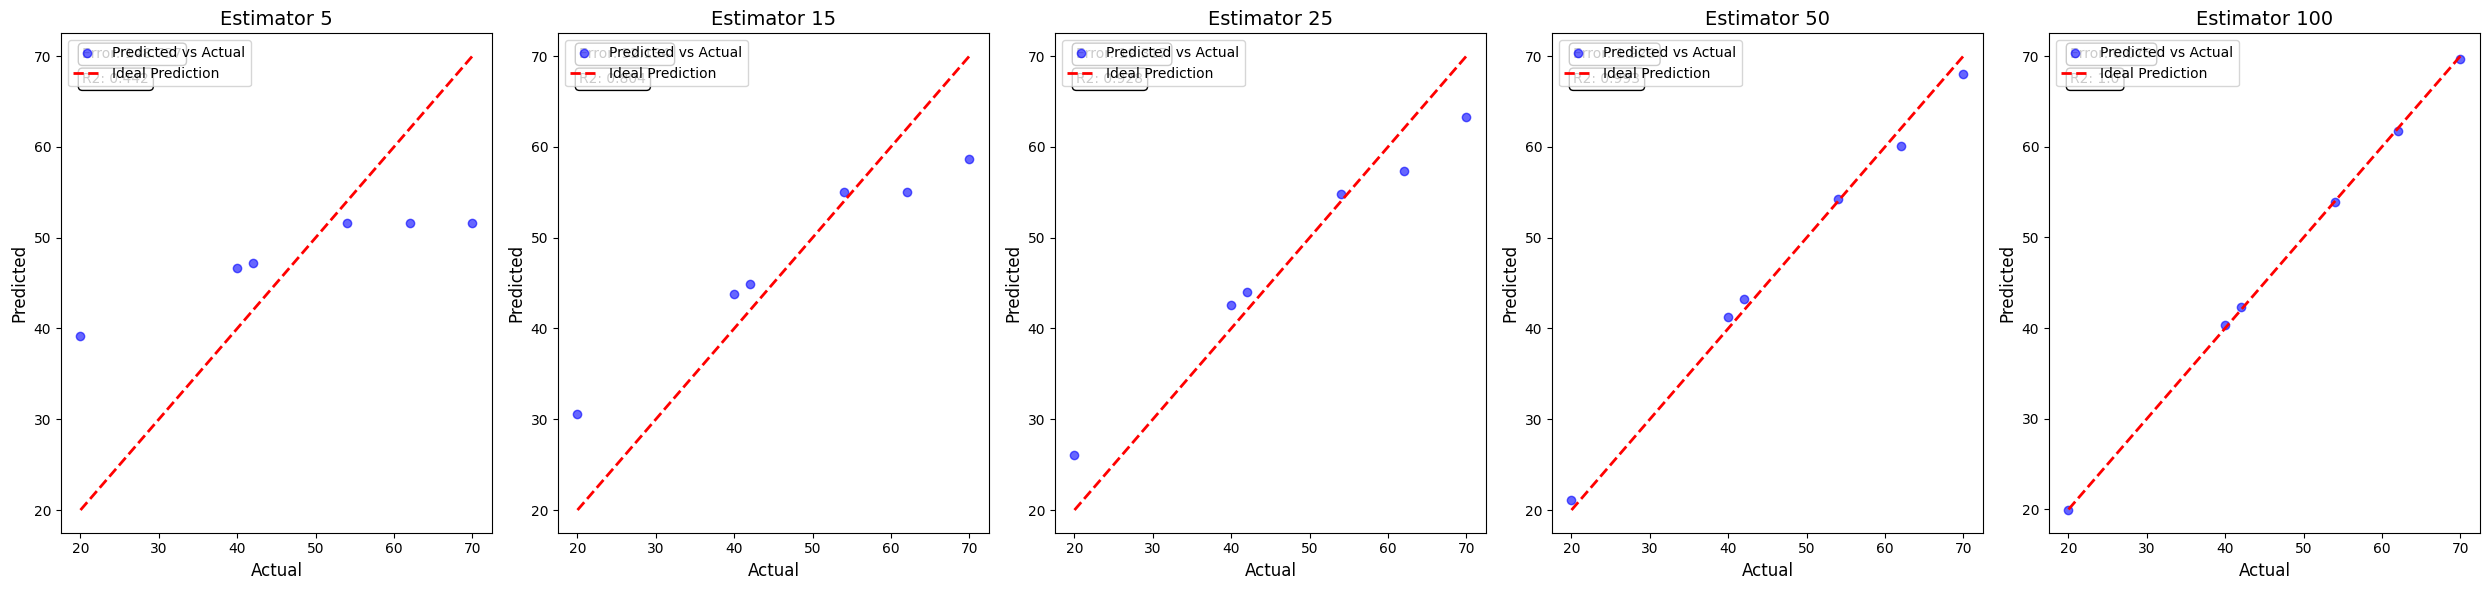


Final Predictions:
   Actual  Predicted
0      20  19.931880
1      40  40.368912
2      54  53.932853
3      70  69.703407
4      42  42.357385
5      62  61.705563


In [5]:
learning_rate = 0.1
n_estimators = 100
# Run gradient boosting
models, final_predictions, loss_values = gradient_boosting(x, y, n_estimators, learning_rate)

# Plot the predictions
plot_predictions(y, final_predictions, [5, 15, 25, 50, 100])

# Create a DataFrame to store the predictions
df_predictions = pd.DataFrame({
    "Actual": y,
    "Predicted": final_predictions['prediction_100'] # Select the last prediction column
})
print("\nFinal Predictions:")
print(df_predictions)

Iteration 1: Loss = 235.88666666666674
Iteration 2: Loss = 209.80194666666674
Iteration 3: Loss = 186.97230628666674
Iteration 4: Loss = 166.26335282542925
Iteration 5: Loss = 148.73685662588852
Iteration 6: Loss = 132.80896273327275
Iteration 7: Loss = 119.3544097937376
Iteration 8: Loss = 107.1031652887006
Iteration 9: Loss = 96.66556570082481
Iteration 10: Loss = 86.98368950137338
Iteration 11: Loss = 78.16156493295146
Iteration 12: Loss = 70.72962175818556
Iteration 13: Loss = 63.817332651902746
Iteration 14: Loss = 57.457396516907316
Iteration 15: Loss = 52.13350626210123
Iteration 16: Loss = 47.13249999680426
Iteration 17: Loss = 42.665674096540734
Iteration 18: Loss = 38.62643513760878
Iteration 19: Loss = 34.87520372682927
Iteration 20: Loss = 31.702556793156987
Iteration 21: Loss = 28.603594475768066
Iteration 22: Loss = 25.907397568120544
Iteration 23: Loss = 23.559076197175216
Iteration 24: Loss = 21.219276496029664
Iteration 25: Loss = 19.317136185563943
Iteration 26: Loss 

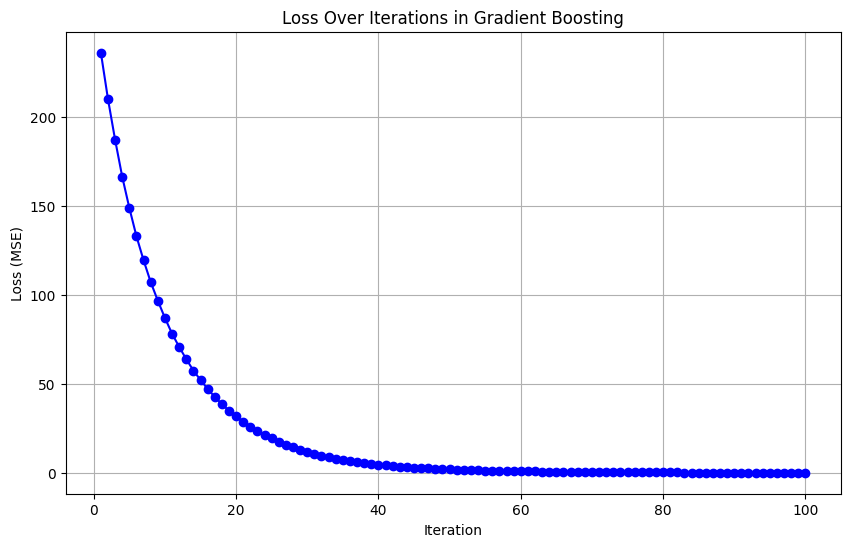


Final Predictions DataFrame:
   Actual  prediction_1  prediction_2  prediction_3  prediction_4  \
0      20          46.2        43.580       42.0298     40.553355   
1      40          46.2        46.724       47.4991     46.022655   
2      54          48.9        49.424       50.1991     50.937323   
3      70          48.9        49.424       50.1991     50.937323   
4      42          48.9        49.424       47.8738     48.612023   
5      62          48.9        49.424       50.1991     50.937323   

   prediction_5  prediction_6  prediction_7  prediction_8  prediction_9  ...  \
0     39.195086     37.900242     36.710171     35.574564     35.243098  ...   
1     46.701789     45.406946     46.001981     44.866373     44.534908  ...   
2     51.616457     52.263879     52.858914     53.426718     53.095252  ...   
3     51.616457     52.263879     52.858914     53.426718     55.084046  ...   
4     47.253754     47.901176     46.711105     47.278908     46.947443  ...   
5     

In [7]:
# Run gradient boosting and capture the loss values
models, df_preds, loss_values = gradient_boosting(x, y, n_estimators=100, learning_rate=0.1)

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss Over Iterations in Gradient Boosting')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

# Display final predictions
print("\nFinal Predictions DataFrame:")
print(df_preds)


In this gradient boosting experiment, I worked through 100 iterations to build a model that improves predictions on each pass by correcting the errors from previous steps. Here's a breakdown of what I observed during the process:

---

### Initial Dataset:
I started with a simple dataset that had two features (`a` and `b`) and a target value (`target`), like this:
- Features: `a` = [1, 2, 3, 4, 1, 2] and `b` = [5, 6, 7, 8, 9, 10]
- Target: `target` = [20, 40, 54, 70, 42, 62]

---

### Predictions After 100 Iterations:
By the end of the 100 iterations, I got the following predictions compared to the actual target values:

| **Actual** | **Predicted (Iteration 100)** |
|------------|-------------------------------|
| 20         | 19.93                         |
| 40         | 40.37                         |
| 54         | 53.93                         |
| 70         | 69.70                         |
| 42         | 42.36                         |
| 62         | 61.71                         |

These predictions were incredibly close to the actual values, showing how well the model performed by the end of the training.

---

### Tracking the Loss:
One of the most important parts of the process was watching how the **Mean Squared Error (MSE)** — essentially how off my predictions were — dropped over time. At first, the errors were pretty high, but they consistently shrank as I added more iterations. For example:
- **Iteration 1**: Loss = 235.89
- **Iteration 25**: Loss = 19.32
- **Iteration 50**: Loss = 1.92
- **Iteration 100**: Loss = 0.0746

This steady reduction in loss meant the model was learning effectively from its mistakes, making better predictions with each new tree added to the boosting process.

---

### Performance and Overfitting:
I was curious about whether the model might overfit the data as I added more iterations. However, the loss kept decreasing smoothly, and there was no sign of the model memorising the data or hitting a plateau, which was a relief. The model stayed generalised and effective throughout.

---

### Key Takeaways:
- **Residual Correction**: Gradient boosting did a great job fixing prediction errors at each step, making the final model highly accurate.
- **Smooth Loss Reduction**: The way the loss dropped so consistently showed me that the model kept improving at every stage, even with small updates.
- **No Overfitting**: I was pleased to see no signs of overfitting, as the performance remained stable and the loss never shot back up.

Overall, this experiment was a great reminder of how powerful gradient boosting can be, especially when it comes to fine-tuning predictions and tackling residual errors in an organised, iterative way.

# (Optional) Run your algorithm against the Shopping data set

Make sure to do the appropriate preprocessing of the data before  running it through your algorithm.

In [8]:
df = pd.read_csv("Shopping_data.csv")
df.reset_index(drop=True)
df.dropna(inplace=True)
x = df[["Age", "Annual Income (k$)"]]
y = df["Spending Score (1-100)"]

FileNotFoundError: [Errno 2] No such file or directory: 'Shopping_data.csv'

# (Optional) Run your algorithm against the Iris data set

Make sure to do the appropriate preprocessing of the data before  running it through your algorithm.

In [ ]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True, as_frame=True)